# **DS Real Estates**

### **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

### **Loading the dataset**

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
data = pd.DataFrame(boston.data)

In [4]:
data.columns = boston.feature_names

In [5]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
data['MEDV']=boston.target


In [7]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [8]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [9]:
# Identifying the unique number of values in the dataset
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [10]:
# Check for missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
# See rows with missing values
data[data.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


In [12]:
# Viewing the data statistics
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3d52de668>,
      dtype=object)

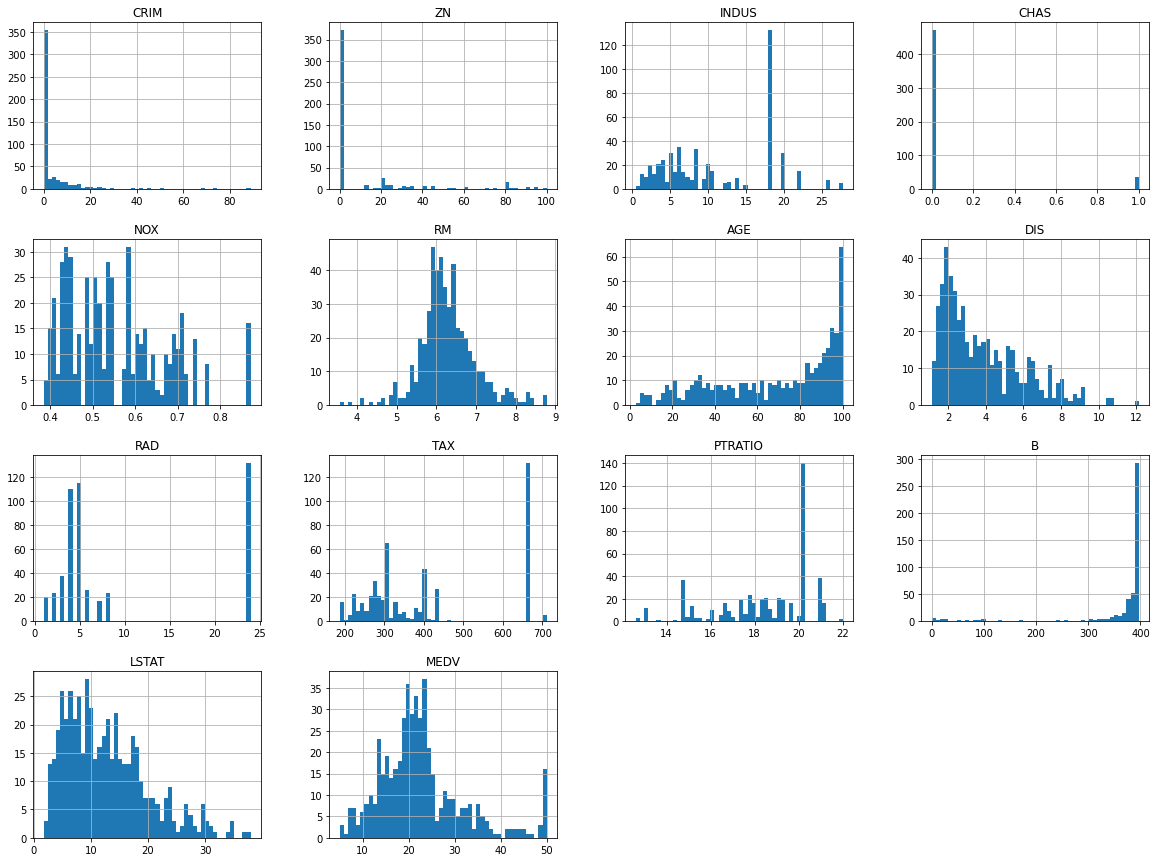

In [13]:
data.hist(bins=50, figsize=(20, 15))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 160.0)

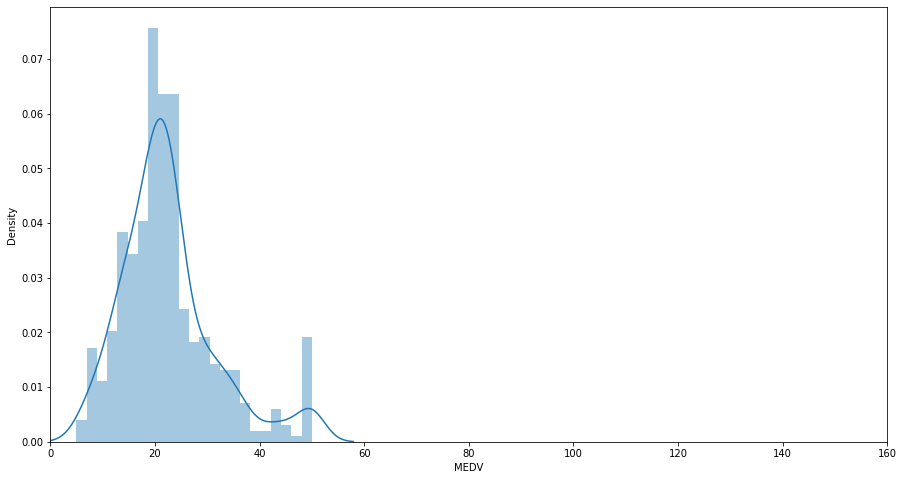

In [14]:
f,ax=plt.subplots(figsize=(15,8))
sns.distplot(data['MEDV'])
plt.xlim([0,160])

In [15]:
corr = data.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [16]:
corr.shape

(14, 14)

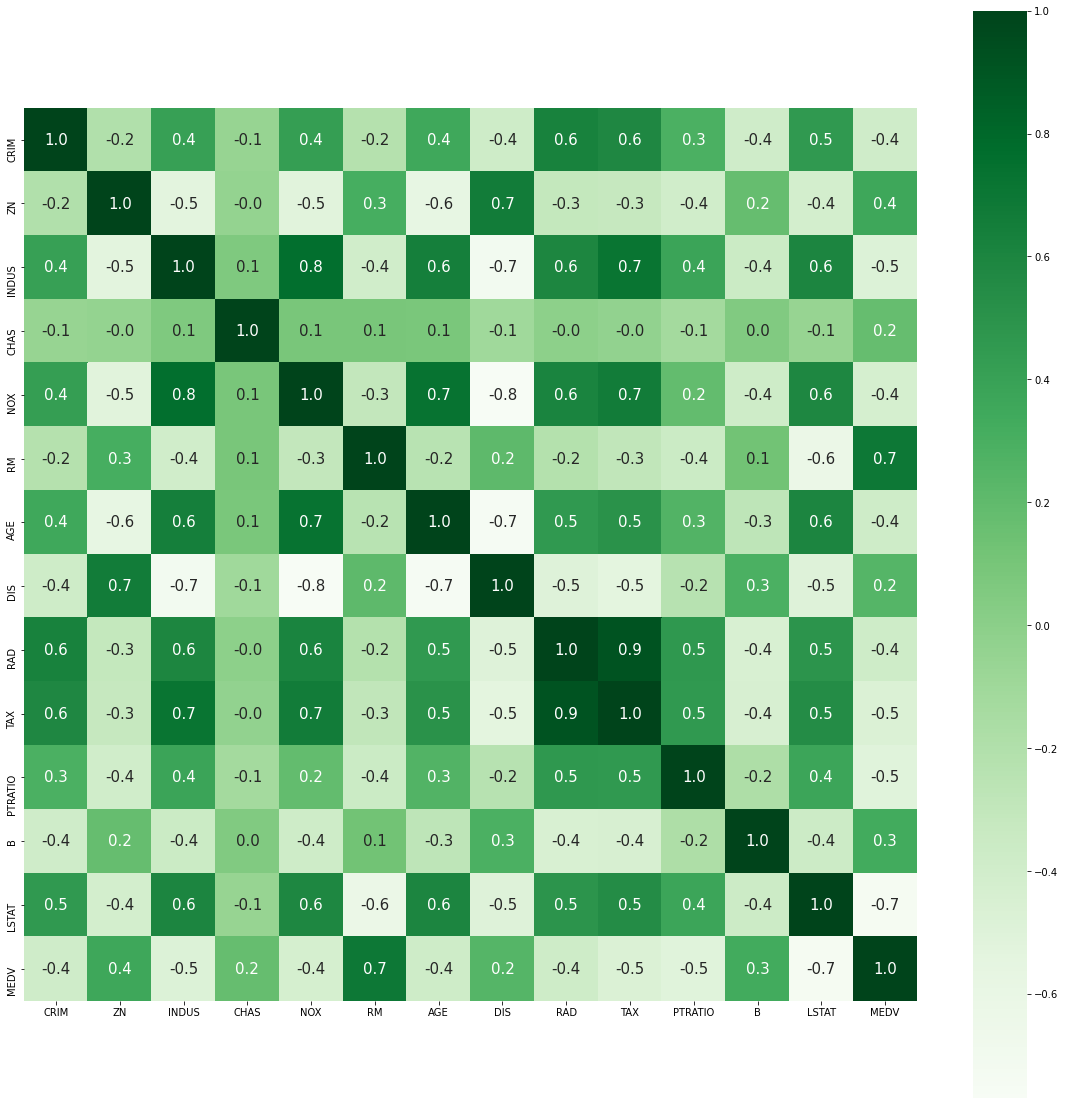

In [17]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [18]:

corr['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3d03bee10>,
      dtype=object)

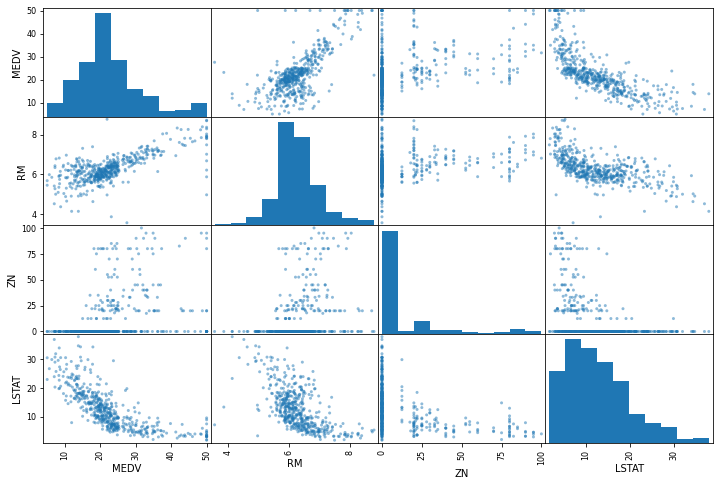

In [19]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(data[attributes], figsize = (12,8))

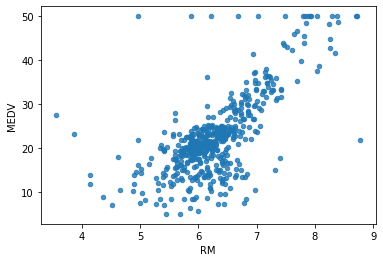

In [20]:
data.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

# **Spliting the dataset**

In [21]:
# Spliting target variable and independent variables
X = data.drop(['MEDV'], axis = 1)
y = data['MEDV']

In [22]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [23]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(354, 13)
(354,)
(152, 13)
(152,)


# **Linear regression**

Training the model

In [24]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)
print("Accuracy on Traing set: ",lm.score(X_train,y_train))
print("Accuracy on Testing set: ",lm.score(X_test,y_test))

Accuracy on Traing set:  0.7465991966746854
Accuracy on Testing set:  0.7121818377409193


In [25]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [26]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [27]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7465991966746854
MAE: 3.0898610949711305
MSE: 19.073688703469035
RMSE: 4.367343437774162


In [28]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_test, y_test_pred))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7121818377409193
MAE: 3.859005592370744
MSE: 30.05399330712416
RMSE: 5.482152251362977


In [29]:
y_train
train_index=pd.DataFrame(y_train.reset_index(),columns=['MEDV'])
train_index

,MEDV
0,23.9
1,18.2
2,21.7
3,13.5
4,50.0
...,...
349,7.2
350,30.3
351,12.8
352,22.6


In [30]:
df=pd.DataFrame(y_pred,columns=['predicted_price'])
df

,predicted_price
0,24.522480
1,15.197510
2,25.577206
3,13.939400
4,39.466513
...,...
349,8.608369
350,31.511078
351,13.647191
352,26.501062


In [31]:
df['actual_prize']=train_index['MEDV']
df

,predicted_price,actual_prize
0,24.522480,23.9
1,15.197510,18.2
2,25.577206,21.7
3,13.939400,13.5
4,39.466513,50.0
...,...,...
349,8.608369,7.2
350,31.511078,30.3
351,13.647191,12.8
352,26.501062,22.6


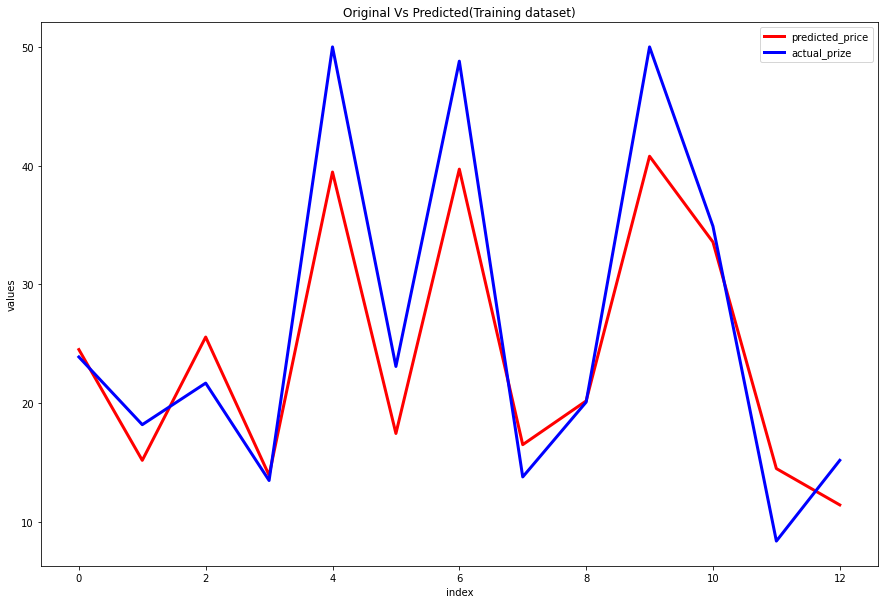

In [32]:
ax=df.iloc[0:13].plot(label="predicted",figsize=(15,10),linewidth=3,color="rb")
plt.legend(loc='upper right')
plt.title("Original Vs Predicted(Training dataset)")
plt.xlabel("index")
plt.ylabel("values")
plt.show()

In [33]:
y_test
test_index=pd.DataFrame(y_test.reset_index(),columns=['MEDV'])
test_index

,MEDV
0,16.5
1,24.8
2,17.4
3,19.3
4,37.6
...,...
147,14.9
148,21.9
149,18.5
150,30.8


In [34]:
dft=pd.DataFrame(y_test_pred,columns=['predicted_price'])
dft

,predicted_price
0,11.073809
1,26.479103
2,17.344899
3,19.194861
4,36.361707
...,...
147,17.891931
148,38.439440
149,19.707526
150,31.671812


In [35]:
dft['actual_prize']=test_index['MEDV']
dft

,predicted_price,actual_prize
0,11.073809,16.5
1,26.479103,24.8
2,17.344899,17.4
3,19.194861,19.3
4,36.361707,37.6
...,...,...
147,17.891931,14.9
148,38.439440,21.9
149,19.707526,18.5
150,31.671812,30.8


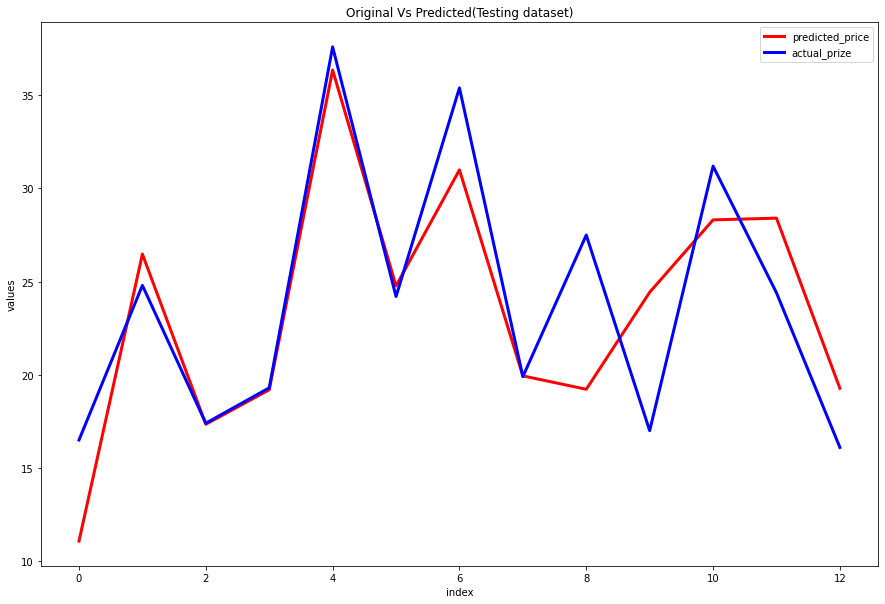

In [36]:
ax=dft.iloc[0:13].plot(label="predicted",figsize=(15,10),linewidth=3,color="rb")
plt.legend(loc='upper right')
plt.title("Original Vs Predicted(Testing dataset)")
plt.xlabel("index")
plt.ylabel("values")
plt.show()

# **Decision Tree Regressor**

In [37]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [38]:
print("Accuracy on Traing set: ",dtr.score(X_train,y_train))
print("Accuracy on Testing set: ",dtr.score(X_test,y_test))

Accuracy on Traing set:  1.0
Accuracy on Testing set:  0.6687323989899613


In [39]:
# Model prediction on train data
y_pred = dtr.predict(X_train)

In [40]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 1.0
MAE: 0.0
MSE: 0.0
RMSE: 0.0


In [41]:
# Predicting Test data with the model
y_test_pred = dtr.predict(X_test)

In [42]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_test, y_test_pred))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.6687323989899613
MAE: 3.458552631578948
MSE: 34.59098684210526
RMSE: 5.881410276634785


In [43]:
y_train
train_index=pd.DataFrame(y_train.reset_index(),columns=['MEDV'])
train_index

,MEDV
0,23.9
1,18.2
2,21.7
3,13.5
4,50.0
...,...
349,7.2
350,30.3
351,12.8
352,22.6


In [44]:
df=pd.DataFrame(y_pred,columns=['predicted_price'])
df

,predicted_price
0,23.9
1,18.2
2,21.7
3,13.5
4,50.0
...,...
349,7.2
350,30.3
351,12.8
352,22.6


In [45]:
df['actual_prize']=train_index['MEDV']
df

,predicted_price,actual_prize
0,23.9,23.9
1,18.2,18.2
2,21.7,21.7
3,13.5,13.5
4,50.0,50.0
...,...,...
349,7.2,7.2
350,30.3,30.3
351,12.8,12.8
352,22.6,22.6


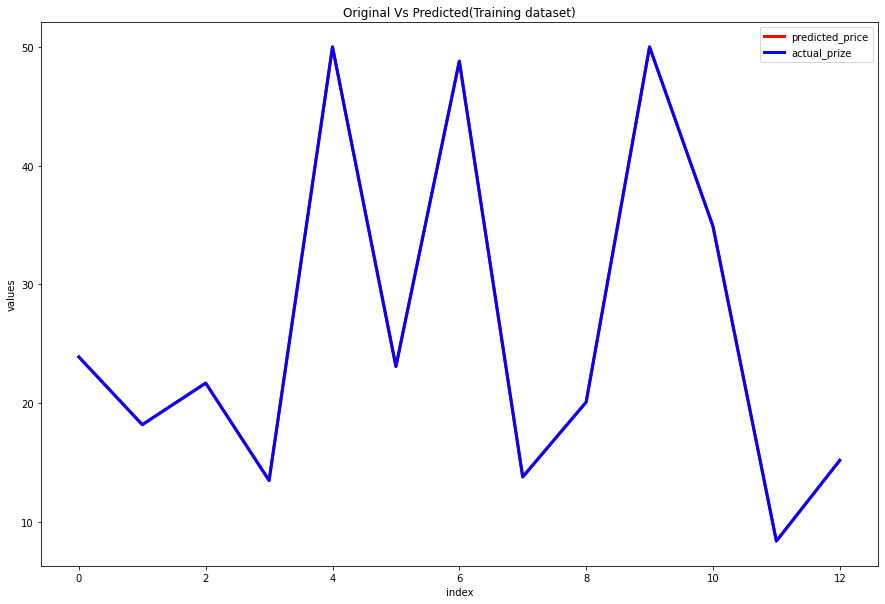

In [46]:
ax=df.iloc[0:13].plot(label="predicted",figsize=(15,10),linewidth=3,color="rb")
plt.legend(loc='upper right')
plt.title("Original Vs Predicted(Training dataset)")
plt.xlabel("index")
plt.ylabel("values")
plt.show()

In [47]:
y_test
test_index=pd.DataFrame(y_test.reset_index(),columns=['MEDV'])
test_index

,MEDV
0,16.5
1,24.8
2,17.4
3,19.3
4,37.6
...,...
147,14.9
148,21.9
149,18.5
150,30.8


In [48]:
dft=pd.DataFrame(y_test_pred,columns=['predicted_price'])
dft

,predicted_price
0,14.4
1,25.1
2,20.9
3,22.5
4,48.3
...,...
147,15.4
148,38.7
149,18.7
150,27.9


In [49]:
dft['actual_prize']=test_index['MEDV']
dft

,predicted_price,actual_prize
0,14.4,16.5
1,25.1,24.8
2,20.9,17.4
3,22.5,19.3
4,48.3,37.6
...,...,...
147,15.4,14.9
148,38.7,21.9
149,18.7,18.5
150,27.9,30.8


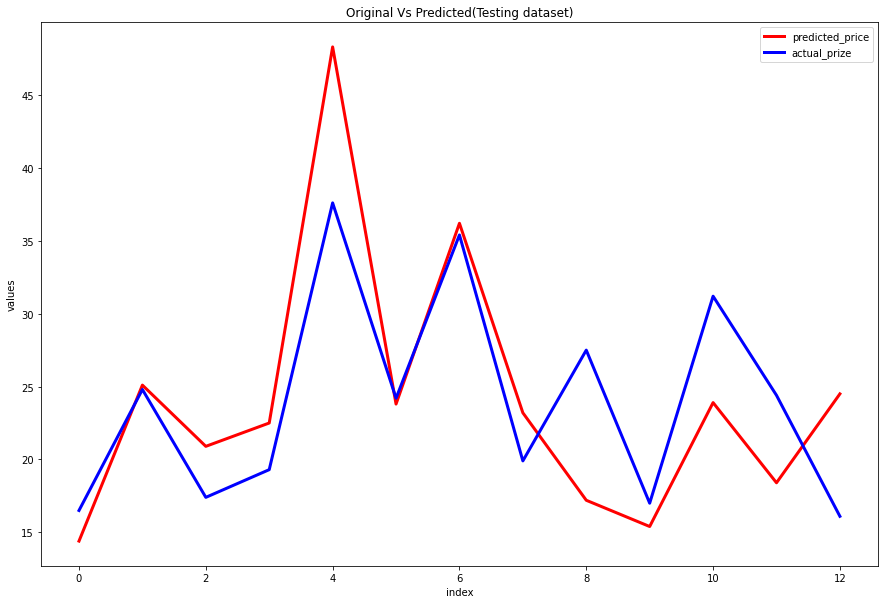

In [50]:
ax=dft.iloc[0:13].plot(label="predicted",figsize=(15,10),linewidth=3,color="rb")
plt.legend(loc='upper right')
plt.title("Original Vs Predicted(Testing dataset)")
plt.xlabel("index")
plt.ylabel("values")
plt.show()

# **Random Forest Regressor**

In [51]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [52]:
print("Accuracy on Traing set: ",reg.score(X_train,y_train))
print("Accuracy on Testing set: ",reg.score(X_test,y_test))

Accuracy on Traing set:  0.978487690385328
Accuracy on Testing set:  0.840930157856634


In [53]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [54]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.978487690385328
MAE: 0.8519689265536716
MSE: 1.6192493926553677
RMSE: 1.272497305559178


In [55]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [56]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_test, y_test_pred))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.840930157856634
MAE: 2.4677828947368425
MSE: 16.610084414473693
RMSE: 4.075547130689779


In [57]:
y_train
train_index=pd.DataFrame(y_train.reset_index(),columns=['MEDV'])
train_index

,MEDV
0,23.9
1,18.2
2,21.7
3,13.5
4,50.0
...,...
349,7.2
350,30.3
351,12.8
352,22.6


In [58]:
df=pd.DataFrame(y_pred,columns=['predicted_price'])
df

,predicted_price
0,23.248
1,18.590
2,19.965
3,13.893
4,48.123
...,...
349,8.236
350,31.325
351,12.346
352,21.827


In [59]:
df['actual_prize']=train_index['MEDV']
df

,predicted_price,actual_prize
0,23.248,23.9
1,18.590,18.2
2,19.965,21.7
3,13.893,13.5
4,48.123,50.0
...,...,...
349,8.236,7.2
350,31.325,30.3
351,12.346,12.8
352,21.827,22.6


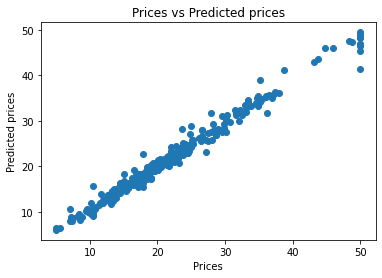

In [60]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

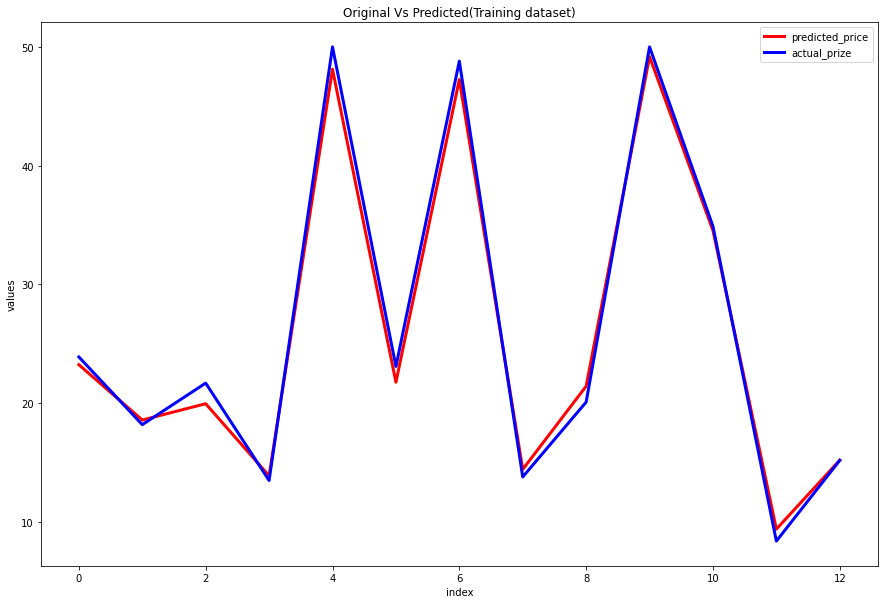

In [61]:
ax=df.iloc[0:13].plot(label="predicted",figsize=(15,10),linewidth=3,color="rb")
plt.legend(loc='upper right')
plt.title("Original Vs Predicted(Training dataset)")
plt.xlabel("index")
plt.ylabel("values")
plt.show()

In [62]:
y_test
test_index=pd.DataFrame(y_test.reset_index(),columns=['MEDV'])
test_index

,MEDV
0,16.5
1,24.8
2,17.4
3,19.3
4,37.6
...,...
147,14.9
148,21.9
149,18.5
150,30.8


In [63]:
dft=pd.DataFrame(y_test_pred,columns=['predicted_price'])
dft

,predicted_price
0,16.696
1,23.745
2,19.058
3,17.596
4,47.485
...,...
147,15.545
148,41.095
149,19.606
150,26.822


In [64]:
dft['actual_prize']=test_index['MEDV']
dft

,predicted_price,actual_prize
0,16.696,16.5
1,23.745,24.8
2,19.058,17.4
3,17.596,19.3
4,47.485,37.6
...,...,...
147,15.545,14.9
148,41.095,21.9
149,19.606,18.5
150,26.822,30.8


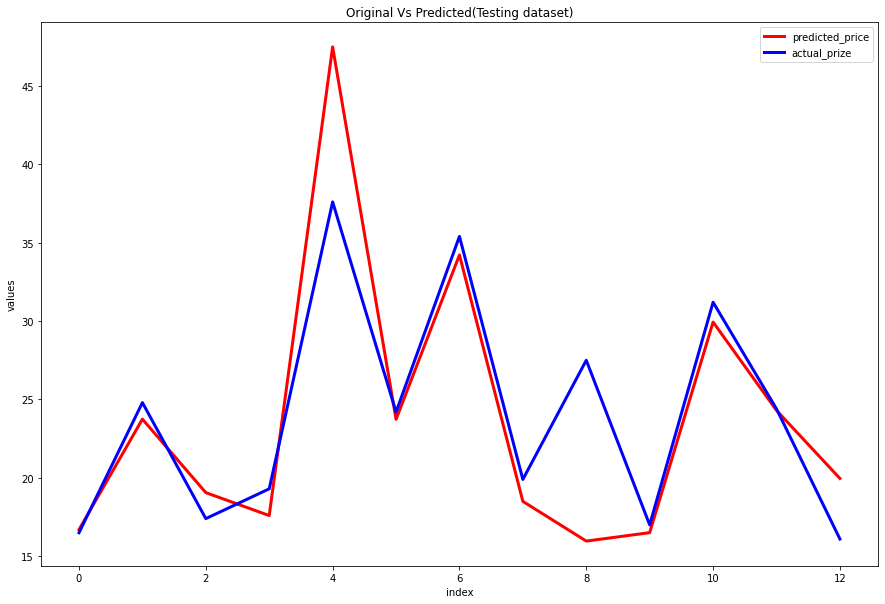

In [65]:
ax=dft.iloc[0:13].plot(label="predicted",figsize=(15,10),linewidth=3,color="rb")
plt.legend(loc='upper right')
plt.title("Original Vs Predicted(Testing dataset)")
plt.xlabel("index")
plt.ylabel("values")
plt.show()

### **We analyzed performence all the models and then selected Random Forest Regression model as it is most accuracte of all three.**

## **Using the model to predict prices**

In [66]:
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747, -11.44443979304, -49.31238772, 7.61111401, -26.0016879 , -0.5778192 , -0.97491834, 0.41164221, -66.86091034]])

In [67]:
reg.predict(features)

array([27.936])